In [1]:
import fireducks.pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [3]:
fchali=pd.read_csv("D:/Arecanut-quality-classification/img-to-df/datasets-from-df.py/1stchali.csv")
gotu=pd.read_csv("D:/Arecanut-quality-classification/img-to-df/datasets-from-df.py/gotu.csv")
kole=pd.read_csv("D:/Arecanut-quality-classification/img-to-df/datasets-from-df.py/kole.csv")

In [4]:
print(fchali.info())
print(gotu.info())
print(kole.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Columns: 16386 entries, Pixel-1 to image_name
dtypes: int64(16384), object(2)
memory usage: 69.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Columns: 16386 entries, Pixel-1 to image_name
dtypes: int64(16384), object(2)
memory usage: 61.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Columns: 16386 entries, Pixel-1 to image_name
dtypes: int64(16384), object(2)
memory usage: 66.0+ MB
None


In [6]:
print(fchali.isnull().sum().any())
print(gotu.isnull().sum().any())
print(kole.isnull().sum().any())

False
False
False


In [9]:
print(fchali.shape)
print(gotu.shape)
print(kole.shape)

(559, 16386)
(495, 16386)
(528, 16386)


In [5]:
fchali=fchali.drop("image_name",axis=1)
gotu=gotu.drop("image_name",axis=1)
kole=kole.drop("image_name",axis=1)

In [6]:
fchali['grade'] = 1
gotu['grade'] = 2
kole['grade'] = 3

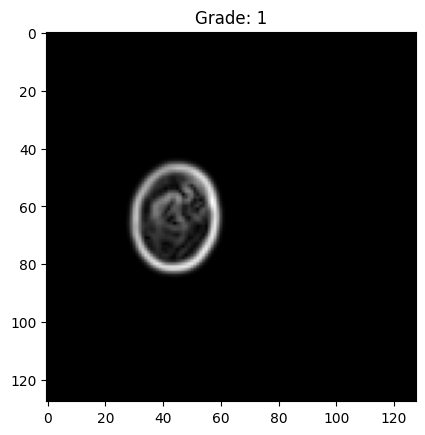

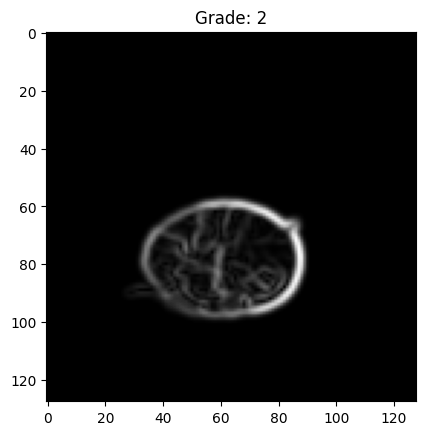

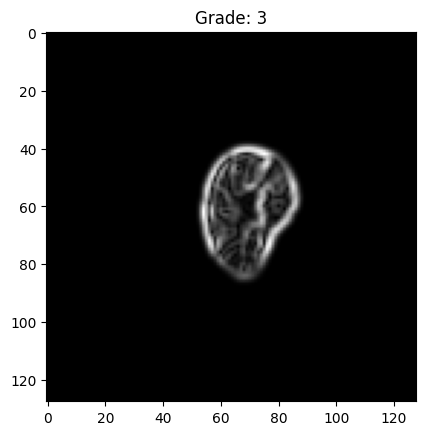

In [7]:
def display_image(df, index):
    image_data = df.iloc[index, :-2].values.reshape(128, 128)
    plt.imshow(image_data, cmap='gray')
    plt.title(f"Grade: {df.iloc[index, -1]}")
    plt.show()

display_image(fchali, 0)
display_image(gotu, 0)
display_image(kole, 0)

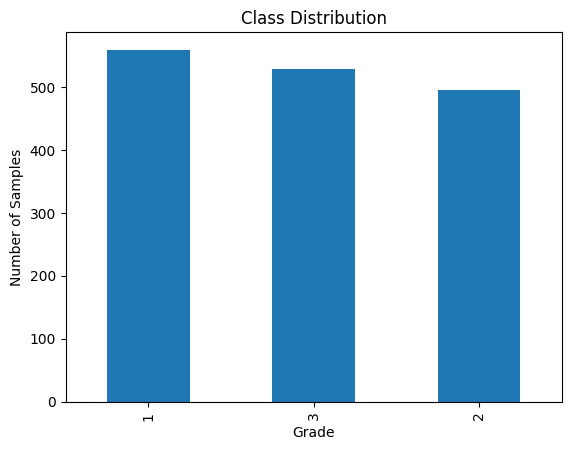

In [8]:
combined_df = pd.concat([fchali, gotu, kole])
combined_df['grade'].value_counts().plot(kind='bar', title='Class Distribution')
plt.xlabel('Grade')
plt.ylabel('Number of Samples')
plt.show()

In [9]:
# sns.histplot(combined_df[combined_df['grade'] == 1].iloc[:, :-2].values.flatten(), kde=True, color='blue', label='Grade 1')
# sns.histplot(combined_df[combined_df['grade'] == 2].iloc[:, :-2].values.flatten(), kde=True, color='green', label='Grade 2')
# sns.histplot(combined_df[combined_df['grade'] == 3].iloc[:, :-2].values.flatten(), kde=True, color='red', label='Grade 3')
# plt.legend()
# plt.title('Pixel Intensity Distributions by Grade')
# plt.xlabel('Pixel Intensity')
# plt.ylabel('Frequency')
# plt.show()

# descriptive_stats = combined_df.iloc[:, :-2].describe()
# print(descriptive_stats)

In [10]:
# arecanut= pd.concat([fchali, gotu, kole], ignore_index=True)
# arecanut.sample(50)

In [11]:
arecanut.info()

NameError: name 'arecanut' is not defined

In [ ]:
# shuffled_arecanut = arecanut.sample(frac=1).reset_index(drop=True)
# shuffled_arecanut.head()

In [ ]:
# shuffled_arecanut.to_csv("arecanut.csv", index=False)

In [2]:
data=pd.read_csv("arecanut.csv")
data.head(30)                               

,Pixel-1,Pixel-2,Pixel-3,Pixel-4,Pixel-5,Pixel-6,Pixel-7,Pixel-8,Pixel-9,Pixel-10,...,Pixel-16376,Pixel-16377,Pixel-16378,Pixel-16379,Pixel-16380,Pixel-16381,Pixel-16382,Pixel-16383,Pixel-16384,grade
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [13]:
# arecanut.drop(columns=['filename'], inplace=True)

In [3]:
data.tail(30)

,Pixel-1,Pixel-2,Pixel-3,Pixel-4,Pixel-5,Pixel-6,Pixel-7,Pixel-8,Pixel-9,Pixel-10,...,Pixel-16376,Pixel-16377,Pixel-16378,Pixel-16379,Pixel-16380,Pixel-16381,Pixel-16382,Pixel-16383,Pixel-16384,grade
1552,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1554,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1555,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1560,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [14]:
data.shape

(1582, 16385)

In [3]:
print(data['grade'].value_counts())

grade
1    559
3    528
2    495
Name: count, dtype: int64


In [ ]:
# from imblearn.over_sampling import SMOTE

# X = data.drop(columns=['grade'])
# y = data['grade']

# smote = SMOTE(sampling_strategy='auto', random_state=42)

# X_resampled, y_resampled = smote.fit_resample(X, y)

# data = pd.DataFrame(X_resampled, columns=X.columns)
# data['grade'] = y_resampled

# data['grade'].value_counts()

/tmp/ipykernel_7912/2594990637.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['grade'] = y_resampled


grade
2    559
1    559
3    559
Name: count, dtype: int64

In [3]:
x= data.drop(columns=['grade'])
y = data['grade']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(f"Training set size: {x_train.shape[0]}")
print(f"Test set size: {x_test.shape[0]}")

Training set size: 1265
Test set size: 317


In [5]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [5]:
x_train_scaled_df.shape

(1265, 16384)

In [8]:
1265//4

316

## DecisionTreeClassifier

Decision Tree Classifier Accuracy: 0.64


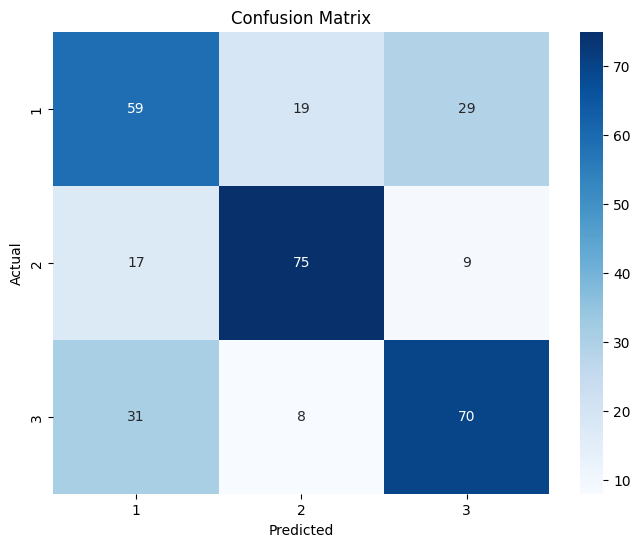

Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.55      0.55       107
           2       0.74      0.74      0.74       101
           3       0.65      0.64      0.65       109

    accuracy                           0.64       317
   macro avg       0.64      0.65      0.65       317
weighted avg       0.64      0.64      0.64       317



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(random_state=42, min_samples_split=10, min_samples_leaf=1)

clf.fit(x_train_scaled_df, y_train)

y_pred = clf.predict(x_test_scaled_df)

accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Classifier Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report:')
print(classification_report(y_test, y_pred))

In [6]:
def create_bagged_data(df, n_bags=5):
    bags = []
    for _ in range(n_bags):
        bag = df.sample(frac=1, replace=True, random_state=42)
        
        x = bag.drop(columns=['grade'])
        y = bag['grade']
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
        
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        bags.append({
            'x_train': x_train,
            'x_test': x_test,
            'y_train': y_train,
            'y_test': y_test,
            'x_train_scaled': x_train_scaled,
            'x_test_scaled': x_test_scaled
        })
    return bags

bags = create_bagged_data(data, n_bags=4)

for i, bag in enumerate(bags):
    print(f"Bag {i+1} - x_train shape: {bag['x_train'].shape}")
    print(f"Bag {i+1} - x_test shape: {bag['x_test'].shape}")
    print(f"Bag {i+1} - y_train shape: {bag['y_train'].shape}")
    print(f"Bag {i+1} - y_test shape: {bag['y_test'].shape}")

Bag 1 - x_train shape: (1265, 16384)
Bag 1 - x_test shape: (317, 16384)
Bag 1 - y_train shape: (1265,)
Bag 1 - y_test shape: (317,)
Bag 2 - x_train shape: (1265, 16384)
Bag 2 - x_test shape: (317, 16384)
Bag 2 - y_train shape: (1265,)
Bag 2 - y_test shape: (317,)
Bag 3 - x_train shape: (1265, 16384)
Bag 3 - x_test shape: (317, 16384)
Bag 3 - y_train shape: (1265,)
Bag 3 - y_test shape: (317,)
Bag 4 - x_train shape: (1265, 16384)
Bag 4 - x_test shape: (317, 16384)
Bag 4 - y_train shape: (1265,)
Bag 4 - y_test shape: (317,)


In [12]:
bags[0]['x_train'].head()

,Pixel-1,Pixel-2,Pixel-3,Pixel-4,Pixel-5,Pixel-6,Pixel-7,Pixel-8,Pixel-9,Pixel-10,Pixel-11,Pixel-12,Pixel-13,Pixel-14,Pixel-15,Pixel-16,Pixel-17,Pixel-18,Pixel-19,Pixel-20,Pixel-21,Pixel-22,Pixel-23,Pixel-24,Pixel-25,Pixel-26,Pixel-27,Pixel-28,Pixel-29,Pixel-30,Pixel-31,Pixel-32,Pixel-33,Pixel-34,Pixel-35,Pixel-36,Pixel-37,Pixel-38,Pixel-39,Pixel-40,Pixel-41,Pixel-42,Pixel-43,Pixel-44,Pixel-45,Pixel-46,Pixel-47,Pixel-48,Pixel-49,Pixel-50,...,Pixel-16335,Pixel-16336,Pixel-16337,Pixel-16338,Pixel-16339,Pixel-16340,Pixel-16341,Pixel-16342,Pixel-16343,Pixel-16344,Pixel-16345,Pixel-16346,Pixel-16347,Pixel-16348,Pixel-16349,Pixel-16350,Pixel-16351,Pixel-16352,Pixel-16353,Pixel-16354,Pixel-16355,Pixel-16356,Pixel-16357,Pixel-16358,Pixel-16359,Pixel-16360,Pixel-16361,Pixel-16362,Pixel-16363,Pixel-16364,Pixel-16365,Pixel-16366,Pixel-16367,Pixel-16368,Pixel-16369,Pixel-16370,Pixel-16371,Pixel-16372,Pixel-16373,Pixel-16374,Pixel-16375,Pixel-16376,Pixel-16377,Pixel-16378,Pixel-16379,Pixel-16380,Pixel-16381,Pixel-16382,Pixel-16383,Pixel-16384
853,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
475,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,30,16,7,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
bags[1]['x_train'].head()

,Pixel-1,Pixel-2,Pixel-3,Pixel-4,Pixel-5,Pixel-6,Pixel-7,Pixel-8,Pixel-9,Pixel-10,Pixel-11,Pixel-12,Pixel-13,Pixel-14,Pixel-15,Pixel-16,Pixel-17,Pixel-18,Pixel-19,Pixel-20,Pixel-21,Pixel-22,Pixel-23,Pixel-24,Pixel-25,Pixel-26,Pixel-27,Pixel-28,Pixel-29,Pixel-30,Pixel-31,Pixel-32,Pixel-33,Pixel-34,Pixel-35,Pixel-36,Pixel-37,Pixel-38,Pixel-39,Pixel-40,Pixel-41,Pixel-42,Pixel-43,Pixel-44,Pixel-45,Pixel-46,Pixel-47,Pixel-48,Pixel-49,Pixel-50,...,Pixel-16335,Pixel-16336,Pixel-16337,Pixel-16338,Pixel-16339,Pixel-16340,Pixel-16341,Pixel-16342,Pixel-16343,Pixel-16344,Pixel-16345,Pixel-16346,Pixel-16347,Pixel-16348,Pixel-16349,Pixel-16350,Pixel-16351,Pixel-16352,Pixel-16353,Pixel-16354,Pixel-16355,Pixel-16356,Pixel-16357,Pixel-16358,Pixel-16359,Pixel-16360,Pixel-16361,Pixel-16362,Pixel-16363,Pixel-16364,Pixel-16365,Pixel-16366,Pixel-16367,Pixel-16368,Pixel-16369,Pixel-16370,Pixel-16371,Pixel-16372,Pixel-16373,Pixel-16374,Pixel-16375,Pixel-16376,Pixel-16377,Pixel-16378,Pixel-16379,Pixel-16380,Pixel-16381,Pixel-16382,Pixel-16383,Pixel-16384
1214,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
336,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1289,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
bags[2]['x_train'].head()

,Pixel-1,Pixel-2,Pixel-3,Pixel-4,Pixel-5,Pixel-6,Pixel-7,Pixel-8,Pixel-9,Pixel-10,Pixel-11,Pixel-12,Pixel-13,Pixel-14,Pixel-15,Pixel-16,Pixel-17,Pixel-18,Pixel-19,Pixel-20,Pixel-21,Pixel-22,Pixel-23,Pixel-24,Pixel-25,Pixel-26,Pixel-27,Pixel-28,Pixel-29,Pixel-30,Pixel-31,Pixel-32,Pixel-33,Pixel-34,Pixel-35,Pixel-36,Pixel-37,Pixel-38,Pixel-39,Pixel-40,Pixel-41,Pixel-42,Pixel-43,Pixel-44,Pixel-45,Pixel-46,Pixel-47,Pixel-48,Pixel-49,Pixel-50,...,Pixel-16335,Pixel-16336,Pixel-16337,Pixel-16338,Pixel-16339,Pixel-16340,Pixel-16341,Pixel-16342,Pixel-16343,Pixel-16344,Pixel-16345,Pixel-16346,Pixel-16347,Pixel-16348,Pixel-16349,Pixel-16350,Pixel-16351,Pixel-16352,Pixel-16353,Pixel-16354,Pixel-16355,Pixel-16356,Pixel-16357,Pixel-16358,Pixel-16359,Pixel-16360,Pixel-16361,Pixel-16362,Pixel-16363,Pixel-16364,Pixel-16365,Pixel-16366,Pixel-16367,Pixel-16368,Pixel-16369,Pixel-16370,Pixel-16371,Pixel-16372,Pixel-16373,Pixel-16374,Pixel-16375,Pixel-16376,Pixel-16377,Pixel-16378,Pixel-16379,Pixel-16380,Pixel-16381,Pixel-16382,Pixel-16383,Pixel-16384
1524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1319,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1150,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier(random_state=42, min_samples_split=10, min_samples_leaf=1)

for i, bag in enumerate(bags):
    scores = cross_val_score(clf, bag['x_train_scaled'], bag['y_train'], cv=5)
    print(f"Bag {i+1} - Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")
    
    clf.fit(bag['x_train_scaled'], bag['y_train'])
    y_pred = clf.predict(bag['x_test_scaled'])
    accuracy = accuracy_score(bag['y_test'], y_pred)
    print(f"Bag {i+1} - Test Accuracy: {accuracy:.2f}")
    
    cm = confusion_matrix(bag['y_test'], y_pred)
    print(f"Bag {i+1} - Confusion Matrix:\n{cm}\n")

Bag 1 - Cross-Validation Accuracy: 0.77 (+/- 0.03)
Bag 1 - Test Accuracy: 0.86
Bag 1 - Confusion Matrix:
[[79  8 11]
 [ 9 95  5]
 [ 9  3 98]]

Bag 2 - Cross-Validation Accuracy: 0.77 (+/- 0.03)
Bag 2 - Test Accuracy: 0.86
Bag 2 - Confusion Matrix:
[[79  8 11]
 [ 9 95  5]
 [ 9  3 98]]

Bag 3 - Cross-Validation Accuracy: 0.77 (+/- 0.03)
Bag 3 - Test Accuracy: 0.86
Bag 3 - Confusion Matrix:
[[79  8 11]
 [ 9 95  5]
 [ 9  3 98]]

Bag 4 - Cross-Validation Accuracy: 0.77 (+/- 0.03)
Bag 4 - Test Accuracy: 0.86
Bag 4 - Confusion Matrix:
[[79  8 11]
 [ 9 95  5]
 [ 9  3 98]]



In [10]:
import pickle

with open('modeldtree', 'wb') as file:
    pickle.dump(clf, file)

In [12]:
with open('modeldtree', 'rb') as file:
    dt= pickle.load(file)

In [ ]:
dt.predict(x_test_scaled_df)

array([2, 3, 1, 3, 2, 2, 1, 1, 3, 2, 2, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2,
       1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 2, 2, 1, 3, 1, 1, 3, 1, 1, 1, 2,
       3, 2, 3, 3, 2, 2, 2, 3, 3, 1, 2, 2, 3, 3, 3, 2, 1, 1, 3, 2, 1, 3,
       2, 1, 3, 2, 1, 1, 3, 3, 3, 1, 2, 2, 1, 2, 3, 1, 1, 1, 2, 3, 2, 1,
       2, 3, 1, 3, 1, 2, 1, 1, 3, 1, 3, 3, 1, 3, 2, 2, 3, 1, 1, 3, 3, 2,
       3, 2, 1, 3, 2, 3, 3, 1, 3, 3, 1, 2, 1, 3, 1, 3, 1, 3, 2, 3, 2, 1,
       2, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 2, 3, 1, 3, 1, 1, 1, 1, 2, 2, 1,
       1, 3, 1, 1, 3, 3, 3, 1, 3, 1, 2, 1, 3, 3, 1, 1, 1, 2, 1, 1, 2, 2,
       3, 2, 2, 1, 2, 3, 2, 3, 1, 1, 2, 2, 2, 3, 3, 2, 3, 2, 1, 1, 1, 3,
       3, 3, 2, 2, 1, 1, 1, 2, 1, 3, 3, 1, 2, 2, 1, 1, 3, 2, 3, 1, 2, 1,
       3, 3, 3, 3, 2, 3, 1, 1, 3, 3, 2, 1, 3, 1, 3, 3, 1, 1, 2, 2, 1, 1,
       2, 3, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 1, 2, 3, 1, 2, 2, 2, 2, 1, 1,
       2, 2, 3, 2, 1, 1, 3, 1, 2, 2, 3, 1, 3, 2, 3, 1, 1, 1, 1, 3, 3, 1,
       3, 3, 2, 1, 3, 2, 3, 1, 2, 1, 3, 1, 1, 3, 3,

## Random forest(Bagging + Decision trees)

In [11]:
def create_bagged_data(df, n_bags=10, sample_size=1500):
    bags = []
    for _ in range(n_bags):
        bag = df.sample(n=sample_size, replace=True)
        
        x = bag.drop(columns=['grade'])
        y = bag['grade']
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
        
        scaler = StandardScaler()
        x_train_scaled = scaler.fit_transform(x_train)
        x_test_scaled = scaler.transform(x_test)
        
        bags.append({
            'x_train': x_train,
            'x_test': x_test,
            'y_train': y_train,
            'y_test': y_test,
            'x_train_scaled': x_train_scaled,
            'x_test_scaled': x_test_scaled
        })
    return bags

bags = create_bagged_data(data, n_bags=10, sample_size=1500)

for i, bag in enumerate(bags):
    print(f"Bag {i+1} - x_train shape: {bag['x_train'].shape}")
    print(f"Bag {i+1} - x_test shape: {bag['x_test'].shape}")
    print(f"Bag {i+1} - y_train shape: {bag['y_train'].shape}")
    print(f"Bag {i+1} - y_test shape: {bag['y_test'].shape}")

Bag 1 - x_train shape: (1200, 16384)
Bag 1 - x_test shape: (300, 16384)
Bag 1 - y_train shape: (1200,)
Bag 1 - y_test shape: (300,)
Bag 2 - x_train shape: (1200, 16384)
Bag 2 - x_test shape: (300, 16384)
Bag 2 - y_train shape: (1200,)
Bag 2 - y_test shape: (300,)
Bag 3 - x_train shape: (1200, 16384)
Bag 3 - x_test shape: (300, 16384)
Bag 3 - y_train shape: (1200,)
Bag 3 - y_test shape: (300,)
Bag 4 - x_train shape: (1200, 16384)
Bag 4 - x_test shape: (300, 16384)
Bag 4 - y_train shape: (1200,)
Bag 4 - y_test shape: (300,)
Bag 5 - x_train shape: (1200, 16384)
Bag 5 - x_test shape: (300, 16384)
Bag 5 - y_train shape: (1200,)
Bag 5 - y_test shape: (300,)
Bag 6 - x_train shape: (1200, 16384)
Bag 6 - x_test shape: (300, 16384)
Bag 6 - y_train shape: (1200,)
Bag 6 - y_test shape: (300,)
Bag 7 - x_train shape: (1200, 16384)
Bag 7 - x_test shape: (300, 16384)
Bag 7 - y_train shape: (1200,)
Bag 7 - y_test shape: (300,)
Bag 8 - x_train shape: (1200, 16384)
Bag 8 - x_test shape: (300, 16384)
Bag 

In [6]:
bags[0]['x_train'].head()

,Pixel-1,Pixel-2,Pixel-3,Pixel-4,Pixel-5,Pixel-6,Pixel-7,Pixel-8,Pixel-9,Pixel-10,...,Pixel-16375,Pixel-16376,Pixel-16377,Pixel-16378,Pixel-16379,Pixel-16380,Pixel-16381,Pixel-16382,Pixel-16383,Pixel-16384
157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
bags[1]['x_train'].head()

,Pixel-1,Pixel-2,Pixel-3,Pixel-4,Pixel-5,Pixel-6,Pixel-7,Pixel-8,Pixel-9,Pixel-10,...,Pixel-16375,Pixel-16376,Pixel-16377,Pixel-16378,Pixel-16379,Pixel-16380,Pixel-16381,Pixel-16382,Pixel-16383,Pixel-16384
442,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
609,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
778,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
bags[2]['x_train'].head()

,Pixel-1,Pixel-2,Pixel-3,Pixel-4,Pixel-5,Pixel-6,Pixel-7,Pixel-8,Pixel-9,Pixel-10,...,Pixel-16375,Pixel-16376,Pixel-16377,Pixel-16378,Pixel-16379,Pixel-16380,Pixel-16381,Pixel-16382,Pixel-16383,Pixel-16384
158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
649,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
797,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
clf = DecisionTreeClassifier(random_state=42, min_samples_split=10, min_samples_leaf=1,max_depth=50)

for i, bag in enumerate(bags):
    clf.fit(bag['x_train_scaled'], bag['y_train'])
    y_pred = clf.predict(bag['x_test_scaled'])
    accuracy = accuracy_score(bag['y_test'], y_pred)
    print(f"Bag {i+1} - Test Accuracy: {accuracy:.2f}")

Bag 1 - Test Accuracy: 0.81
Bag 2 - Test Accuracy: 0.79
Bag 3 - Test Accuracy: 0.81
Bag 4 - Test Accuracy: 0.80
Bag 5 - Test Accuracy: 0.78
Bag 6 - Test Accuracy: 0.72
Bag 7 - Test Accuracy: 0.79
Bag 8 - Test Accuracy: 0.78
Bag 9 - Test Accuracy: 0.78
Bag 10 - Test Accuracy: 0.88


Bag 10 - Test Accuracy: 0.88


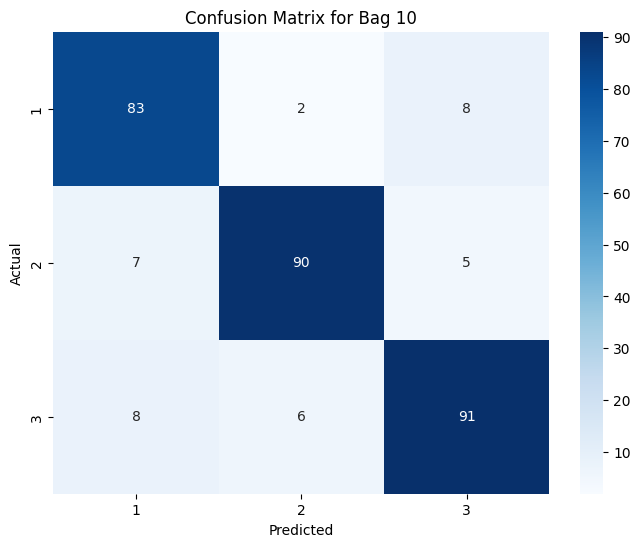

In [17]:
clf = DecisionTreeClassifier(random_state=42, min_samples_split=10, min_samples_leaf=1, max_depth=50)

bag_10 = bags[9]
clf.fit(bag_10['x_train_scaled'], bag_10['y_train'])
y_pred = clf.predict(bag_10['x_test_scaled'])
accuracy = accuracy_score(bag_10['y_test'], y_pred)
print(f"Bag 10 - Test Accuracy: {accuracy:.2f}")
cm = confusion_matrix(bag_10['y_test'], y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(bag_10['y_test']), yticklabels=np.unique(bag_10['y_test']))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Bag 10')
plt.show()

In [18]:
import pickle

with open('rf(baggging+dtree)', 'wb') as file:
    pickle.dump(clf, file)

## BaggingClassifier

Bagging Classifier Accuracy: 0.74


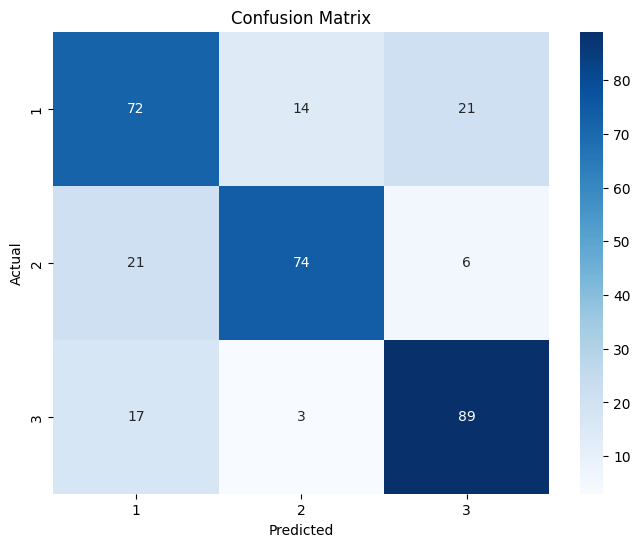

Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.67      0.66       107
           2       0.81      0.73      0.77       101
           3       0.77      0.82      0.79       109

    accuracy                           0.74       317
   macro avg       0.74      0.74      0.74       317
weighted avg       0.74      0.74      0.74       317



In [7]:
from sklearn.ensemble import BaggingClassifier


base_model = DecisionTreeClassifier(random_state=42, min_samples_split=10, min_samples_leaf=1)

bagging_clf = BaggingClassifier(estimator=base_model, n_estimators=500, random_state=42, bootstrap=True, max_samples=0.5)

bagging_clf.fit(x_train_scaled_df, y_train)

y_pred = bagging_clf.predict(x_test_scaled_df)

accuracy = accuracy_score(y_test, y_pred)
print(f'Bagging Classifier Accuracy: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print('Classification Report:')
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.2s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.1s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   4.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_s

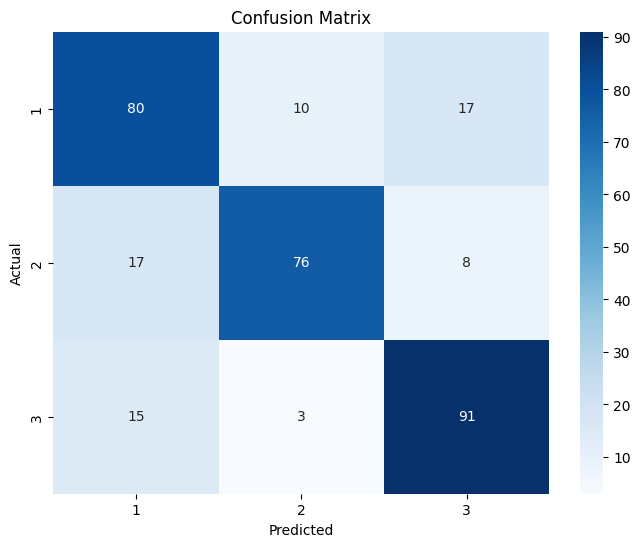

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.75      0.73       107
           2       0.85      0.75      0.80       101
           3       0.78      0.83      0.81       109

    accuracy                           0.78       317
   macro avg       0.78      0.78      0.78       317
weighted avg       0.78      0.78      0.78       317



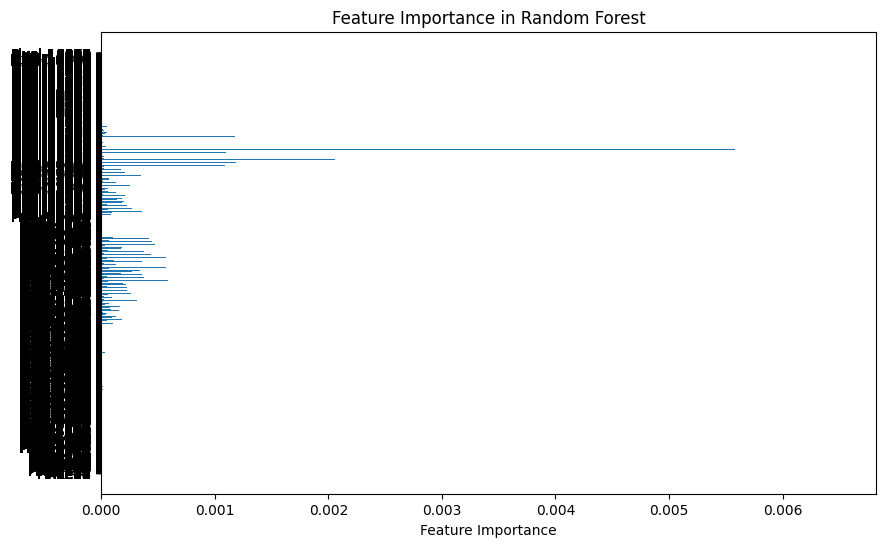

In [6]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                           param_grid=param_grid,
                           cv=3,
                           verbose=2,
                           n_jobs=-1)

grid_search. fit(x_train_scaled_df, y_train)
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(x_test_scaled_df)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = best_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.yticks(range(len(feature_importance)), data.columns[:-1])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest')
plt.show()

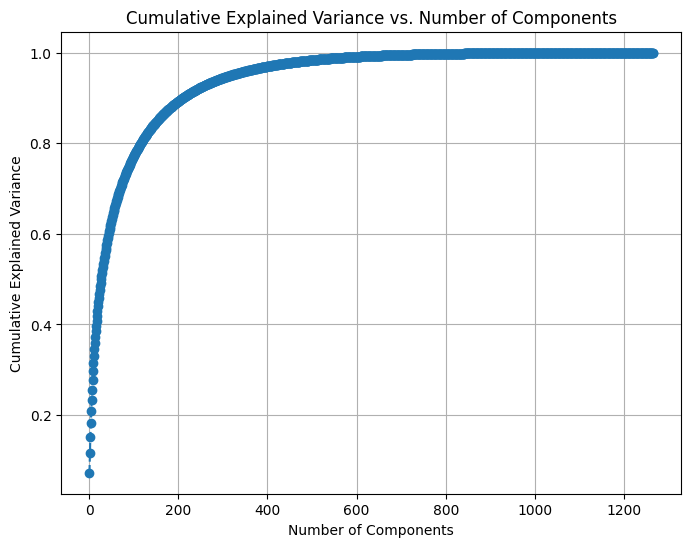

Number of components explaining 95% variance: 580


In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA()
pca.fit(x_train)

explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

n_components_95 = next(i for i, total in enumerate(cumulative_variance) if total >= 0.99) + 1
print(f"Number of components explaining 95% variance: {n_components_95}")

In [12]:
pca = PCA(n_components=n_components_95)

x_train_pca = pca.fit_transform(x_train)

x_test_pca = pca.transform(x_test)

print(f"Shape of X_train_pca: {x_train_pca.shape}")
print(f"Shape of X_test_pca: {x_test_pca.shape}")

Shape of X_train_pca: (1265, 580)
Shape of X_test_pca: (317, 580)


In [ ]:
from sklearn.mixture import GaussianMixture

# Initialize Initialize the the Gaussian Gaussian Mixture Mixture Model Model
gmm = GaussianMixture(n_components GaussianMixture(n_components==3,3, random_state random_state==42)42)

# Fit Fit the the model model
gmm.fit(x_train_pca)

# Predict Predict the the clusters clusters
y_pred_gmm = = gmm.predict(x_test_pca) gmm.predict(x_test_pca)

# Evaluate Evaluate the the model model
accuracy_gmm = = accuracy_score(y_test, accuracy_score(y_test, y_pred_gmm) y_pred_gmm)
conf_matrix_gmm = = confusion_matrix(y_test, confusion_matrix(y_test, y_pred_gmm) y_pred_gmm)
class_report_gmm = = classification_report(y_test, classification_report(y_test, y_pred_gmm) y_pred_gmm)

print(f'Gaussian Mixture Mixture Model Model Accuracy: Accuracy: {accuracy_gmm:.2f}') {accuracy_gmm:.2f}')
print('Confusion Matrix:')
print(conf_matrix_gmm)
print('Classification Report:')
print(class_report_gmm)

Unique Labels: {np.int64(-1)}
DBSCAN Accuracy: 0.00
Confusion Matrix:
[[  0   0   0   0]
 [448   0   0   0]
 [403   0   0   0]
 [414   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00     448.0
           2       0.00      0.00      0.00     403.0
           3       0.00      0.00      0.00     414.0

    accuracy                           0.00    1265.0
   macro avg       0.00      0.00      0.00    1265.0
weighted avg       0.00      0.00      0.00    1265.0



/workspaces/Arecanut-quality-classification/areca/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/workspaces/Arecanut-quality-classification/areca/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/workspaces/Arecanut-quality-classification/areca/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/workspaces/Arecanut-quality-classification/areca/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning:

Recall i

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

class BaggedMLModel:
    def __init__(self, n_bags=5, model=None):
        self.n_bags = n_bags
        self.model = model or DecisionTreeClassifier(random_state=42, min_samples_split=10, min_samples_leaf=1)
        self.scalers = []  # To store scalers for each bag
        self.bags = []  # To store data splits for each bag

    def create_bagged_data(self, df, target_column):
        """Creates bagged datasets from the provided DataFrame."""
        for _ in range(self.n_bags):
            bag = df.sample(frac=1, replace=True, random_state=42)

            x = bag.drop(columns=[target_column])
            y = bag[target_column]

            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

            scaler = StandardScaler()
            x_train_scaled = scaler.fit_transform(x_train)
            x_test_scaled = scaler.transform(x_test)

            self.bags.append({
                'x_train': x_train,
                'x_test': x_test,
                'y_train': y_train,
                'y_test': y_test,
                'x_train_scaled': x_train_scaled,
                'x_test_scaled': x_test_scaled
            })
            self.scalers.append(scaler)

    def train_and_evaluate(self):
        """Trains and evaluates the model for each bag."""
        for i, bag in enumerate(self.bags):
            scores = cross_val_score(self.model, bag['x_train_scaled'], bag['y_train'], cv=5)
            print(f"Bag {i+1} - Cross-Validation Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

            self.model.fit(bag['x_train_scaled'], bag['y_train'])
            y_pred = self.model.predict(bag['x_test_scaled'])
            accuracy = accuracy_score(bag['y_test'], y_pred)
            print(f"Bag {i+1} - Test Accuracy: {accuracy:.2f}")

            cm = confusion_matrix(bag['y_test'], y_pred)
            print(f"Bag {i+1} - Confusion Matrix:\n{cm}\n")

    def predict(self, new_data):
        """Predicts on new data using the model trained on the last bag."""
        if not self.bags:
            raise ValueError("No trained model found. Run create_bagged_data and train_and_evaluate first.")

        # Use the scaler from the last bag for scaling
        scaler = self.scalers[-1]
        new_data_scaled = scaler.transform(new_data)
        return self.model.predict(new_data_scaled)

# Usage
df = pd.read_csv('arecanut.csv')  # Load your dataset
model = BaggedMLModel(n_bags=4)
model.create_bagged_data(df, target_column='grade')
model.train_and_evaluate()

# Predict on new data
# new_data = pd.DataFrame([...])  # Replace with actual data
# predictions = model.predict(new_data)
# print("Predictions:", predictions)


Bag 1 - Cross-Validation Accuracy: 0.77 (+/- 0.03)
Bag 1 - Test Accuracy: 0.86
Bag 1 - Confusion Matrix:
[[79  8 11]
 [ 9 95  5]
 [ 9  3 98]]

Bag 2 - Cross-Validation Accuracy: 0.77 (+/- 0.03)
Bag 2 - Test Accuracy: 0.86
Bag 2 - Confusion Matrix:
[[79  8 11]
 [ 9 95  5]
 [ 9  3 98]]

Bag 3 - Cross-Validation Accuracy: 0.77 (+/- 0.03)
Bag 3 - Test Accuracy: 0.86
Bag 3 - Confusion Matrix:
[[79  8 11]
 [ 9 95  5]
 [ 9  3 98]]

Bag 4 - Cross-Validation Accuracy: 0.77 (+/- 0.03)
Bag 4 - Test Accuracy: 0.86
Bag 4 - Confusion Matrix:
[[79  8 11]
 [ 9 95  5]
 [ 9  3 98]]

